<a href="https://colab.research.google.com/github/sahil301290/AIMLWorkshop2022/blob/main/02_Building_AlexNet_for_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Getting system information

In [1]:
!nvidia-smi

Sat Feb 26 10:12:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##Import libraries

In [2]:
!pip install ipyplot &> /dev/null
print ("ipyplot installed sucessfully!!")

ipyplot installed sucessfully!!


In [3]:
import numpy as np
import matplotlib.pyplot as plt
#from keras import layers
#from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D
import tensorflow as tf
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.image import grayscale_to_rgb
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import ipyplot
from tensorflow.keras.datasets import fashion_mnist


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `base_64` param to `True`.
        


##Defining the train and test set alongwith their labels

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


##Finding total number of images in training and test set

In [5]:
print(len(x_train))
print(len(x_test))

60000
10000


##Getting the shape of data

In [6]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


## Show some of data train image


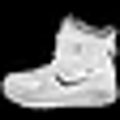
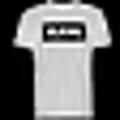
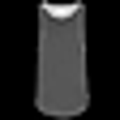
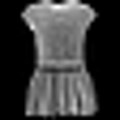
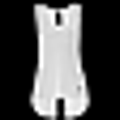
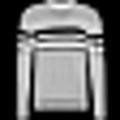
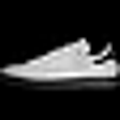
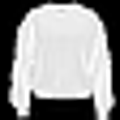
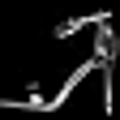
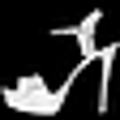
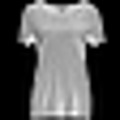
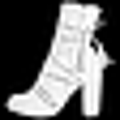
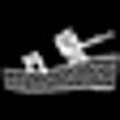
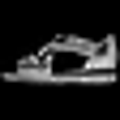
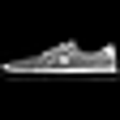
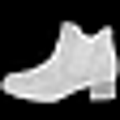
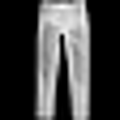
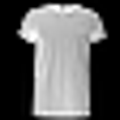


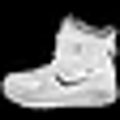
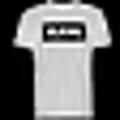
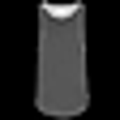
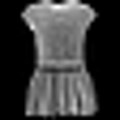
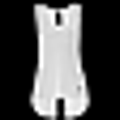
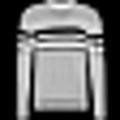
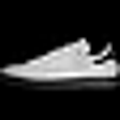
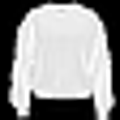
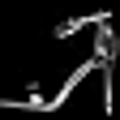
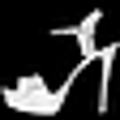
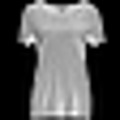
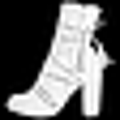
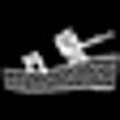
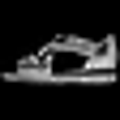
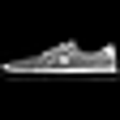
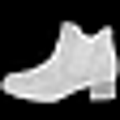
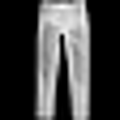
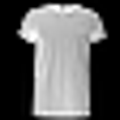

In [7]:
ipyplot.plot_images(x_train, max_images=18, img_width=120)

In [8]:
x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


##Compute the number of labels

In [9]:
num_labels = len(np.unique(y_train))
print("Number Of Labels:",num_labels)

Number Of Labels: 10


In [10]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
print("Train after make To_Categorical:", y_train.shape)
print("Test after make To_Categorical:", y_test.shape)

Train after make To_Categorical: (60000, 10)
Test after make To_Categorical: (10000, 10)


In [12]:
# input image dimensions
image_size = x_train.shape[1]
print("Image Size:", image_size)

Image Size: 28


##Architecture of AlexNet

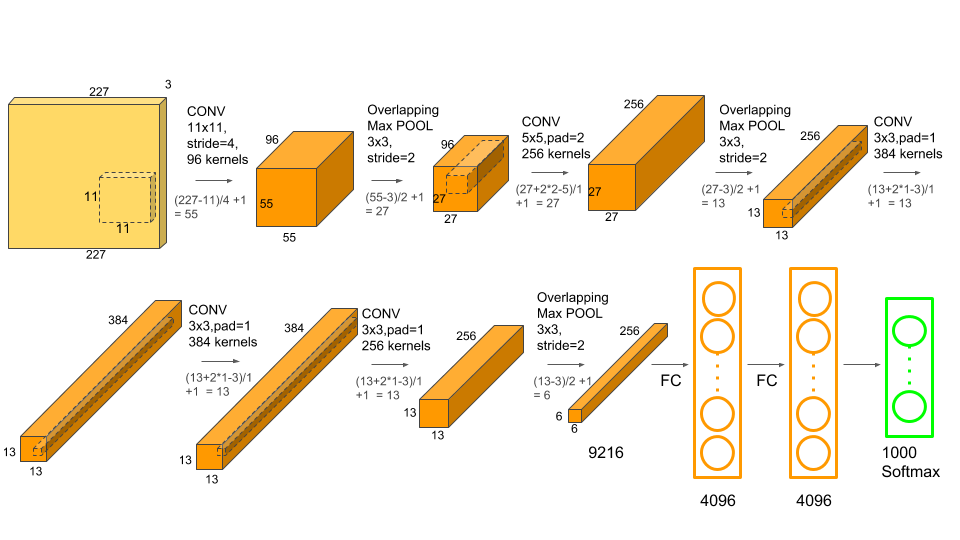

##Defining the AlexNet model

In [13]:
alexNet = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(96,(11,11),activation = 'relu',strides = 4,input_shape=(227,227,3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D((3,3),strides = 2),

  tf.keras.layers.Conv2D(256,(5,5),activation = 'relu',padding = 'same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D((3,3),strides = 2),

  tf.keras.layers.Conv2D(384,(3,3),activation = 'relu',padding = 'same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(384,(3,3),activation = 'relu',padding = 'same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256,(3,3),activation = 'relu',padding = 'same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D((3,3),strides = 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

##Plot the summary by using plot_model

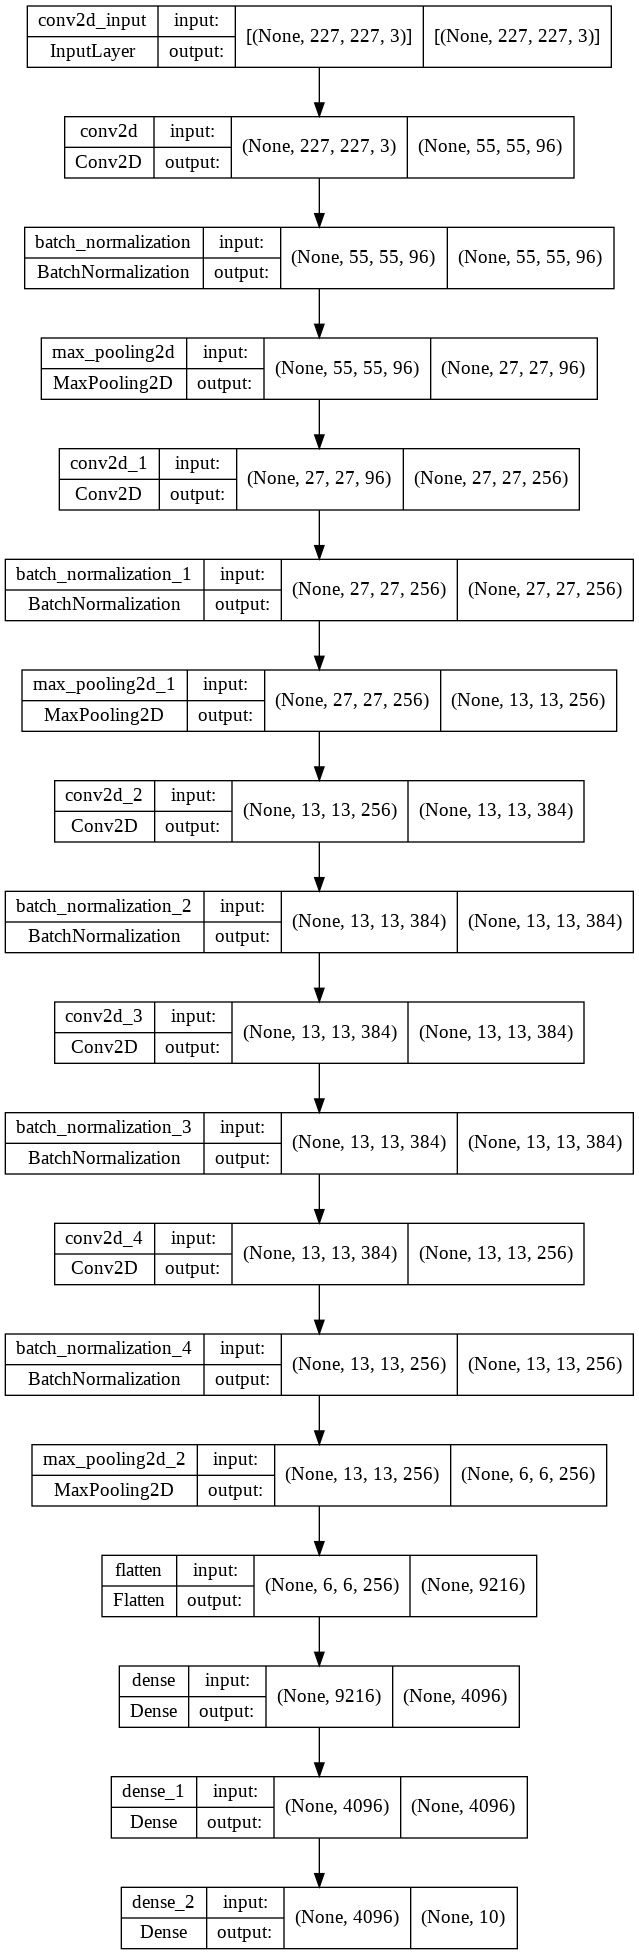

In [14]:
plot_model(alexNet, to_file='AlexNet-FashionMNIST.png', show_shapes=True)

##Model compilation

In [15]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
alexNet.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

##Fashion MNIST Images Dataset Taken from following link:
https://github.com/DeepLenin/fashion-mnist_png

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
!unzip '/content/drive/MyDrive/Datasets DL/FashionMNISTImages.zip'

Streaming output truncated to the last 5000 lines.
 extracting: data/train/1/43772.png  
 extracting: data/train/1/15584.png  
 extracting: data/train/1/42905.png  
 extracting: data/train/1/13767.png  
 extracting: data/train/1/58692.png  
 extracting: data/train/1/36763.png  
 extracting: data/train/1/24056.png  
 extracting: data/train/1/11717.png  
 extracting: data/train/1/7152.png   
 extracting: data/train/1/55760.png  
 extracting: data/train/1/21192.png  
 extracting: data/train/1/38754.png  
 extracting: data/train/1/6326.png   
 extracting: data/train/1/7912.png   
 extracting: data/train/1/9648.png   
 extracting: data/train/1/48116.png  
 extracting: data/train/1/137.png    
 extracting: data/train/1/29305.png  
 extracting: data/train/1/32904.png  
 extracting: data/train/1/24998.png  
 extracting: data/train/1/11925.png  
 extracting: data/train/1/21579.png  
 extracting: data/train/1/46728.png  
 extracting: data/train/1/28366.png  
 extracting: data/train/1/42805.png  

##Reshaping and normalizing training and test images

In [18]:
TRAINING_DIR = "/content/data/train"
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size = 500,
    class_mode = 'categorical',
    target_size = (227,227)
)

VALIDATION_DIR = "/content/data/test"
validation_datagen = ImageDataGenerator(rescale = 1/255)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size = 500,
    class_mode = 'categorical',
    target_size = (227,227)
)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


##Model fitting

In [19]:
history = alexNet.fit_generator(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/5
120/120 [==============================] - 799s 7s/step - loss: 4.4710 - accuracy: 0.5559 - val_loss: 2.2547 - val_accuracy: 0.2974
Epoch 2/5
120/120 [==============================] - 749s 6s/step - loss: 0.7939 - accuracy: 0.6981 - val_loss: 1.7624 - val_accuracy: 0.4168
Epoch 3/5
120/120 [==============================] - 771s 6s/step - loss: 0.6836 - accuracy: 0.7428 - val_loss: 1.9653 - val_accuracy: 0.3642
Epoch 4/5
120/120 [==============================] - 739s 6s/step - loss: 0.6226 - accuracy: 0.7664 - val_loss: 1.2867 - val_accuracy: 0.5537
Epoch 5/5
120/120 [==============================] - 738s 6s/step - loss: 0.5712 - accuracy: 0.7868 - val_loss: 0.9326 - val_accuracy: 0.6282


##Plotting Accuracy and Loss

In [20]:
history.history??

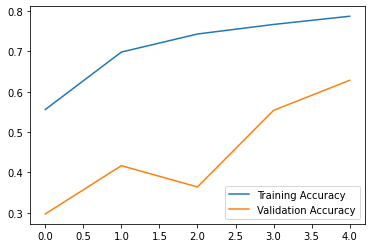

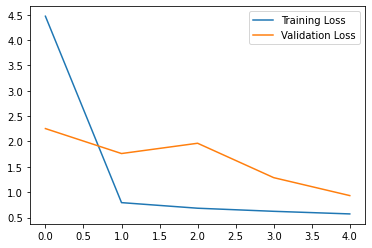

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(len(history.history['accuracy']))

plt.plot(epochs, history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, history.history['loss'], label = 'Training Loss')
plt.plot(epochs, history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()